In [1]:
import seaborn as sns
import pandas as pd
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='species', ylabel='Proportion'>

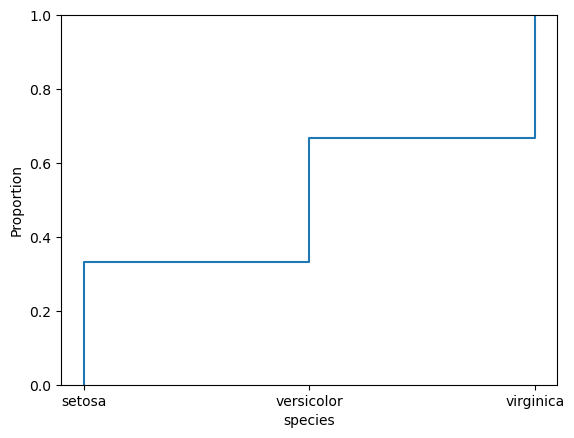

In [3]:
sns.ecdfplot(df["species"])

In [4]:
def species_mapper(species):
    match species:
        case "setosa":
            return 1
        case "versicolor":
            return 2
        case "virginica":
            return 3


df["species"] = df["species"].apply(species_mapper)

In [5]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_width,0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


In [6]:
X = df.iloc[:, :-1]
y = df["species"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

In [8]:
model = DecisionTreeClassifier()

In [9]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [10]:
pred = model.predict(X_test)

In [11]:
accuracy_score(y_test, pred)

0.9333333333333333

In [12]:
joblib.dump(model, 'model.joblib')

['model.joblib']